<a href="https://colab.research.google.com/github/missaixxka/HomeworkJava/blob/main/weatherapp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# WeatherApp.java

In [ ]:
import java.io.IOException;
import java.net.URI;
import java.net.http.HttpClient;
import java.net.http.HttpRequest;
import java.net.http.HttpResponse;

public class WeatherApp {

    private static final String API_KEY = "ee24.....";

    //Город (можно менять)
    private static final String CITY = "Moscow";

    public static void main(String[] args) {
        try {
            String url = "http://api.weatherapi.com/v1/current.json?key=" + API_KEY + "&q=" + CITY + "&aqi=no";

            HttpClient client = HttpClient.newHttpClient();
            HttpRequest request = HttpRequest.newBuilder()
                    .uri(URI.create(url))
                    .build();

            HttpResponse<String> response = client.send(request, HttpResponse.BodyHandlers.ofString());

            if (response.statusCode() == 200) {
                String json = response.body();

                // === Извлекаем и выводим ТЕКСТОВОЕ СООБЩЕНИЕ ===
                String location = extractValue(json, "\"name\":\"", "\"");
                String temp = extractValue(json, "\"temp_c\":", ",");
                String condition = extractValue(json, "\"text\":\"", "\"");
                String country = extractValue(json, "\"country\":\"", "\"");

                System.out.println("Погода в " + location + " (" + country + "): " + temp + "°C, " + condition.toLowerCase() + ".");
                System.out.println(); // пустая строка для разделения

                // === Выводим ПОЛНЫЙ JSON в читаемом формате ===
                System.out.println("Полный JSON-ответ от API:");
                System.out.println("----------------------------------------");
                prettyPrintJson(json);
                System.out.println("----------------------------------------");

            } else {
                System.err.println("Ошибка от API: " + response.statusCode());
                System.err.println(response.body());
            }

        } catch (IOException | InterruptedException e) {
            System.err.println("Ошибка подключения: " + e.getMessage());
            e.printStackTrace();
        }
    }

    // Простой парсер значения из JSON
    private static String extractValue(String json, String start, String end) {
        int startIndex = json.indexOf(start);
        if (startIndex == -1) return "???";
        startIndex += start.length();
        int endIndex = json.indexOf(end, startIndex);
        if (endIndex == -1) return "???";
        return json.substring(startIndex, endIndex).trim();
    }

    // Красивая печать JSON без внешних библиотек
    private static void prettyPrintJson(String json) {
        StringBuilder result = new StringBuilder();
        int indent = 0;
        boolean inString = false;

        for (char c : json.toCharArray()) {
            if (c == '"' && (result.length() == 0 || result.charAt(result.length() - 1) != '\\')) {
                inString = !inString;
            }

            if (!inString) {
                if (c == '{' || c == '[') {
                    result.append(c).append("\n").append("  ".repeat(++indent));
                    continue;
                } else if (c == '}' || c == ']') {
                    result.append("\n").append("  ".repeat(--indent)).append(c);
                    continue;
                } else if (c == ',') {
                    result.append(c).append("\n").append("  ".repeat(indent));
                    continue;
                } else if (c == ':') {
                    result.append(": ");
                    continue;
                }
            }
            result.append(c);
        }

        System.out.println(result.toString());
    }
}

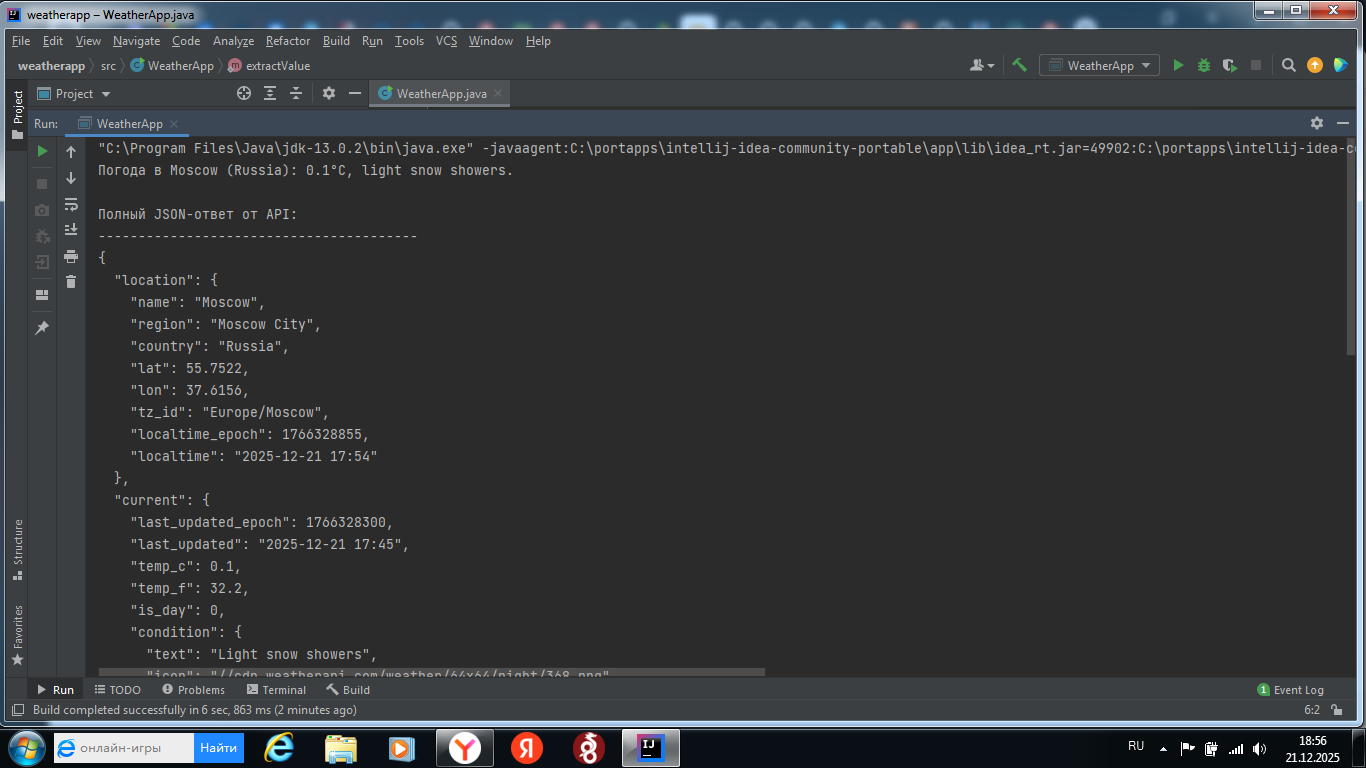

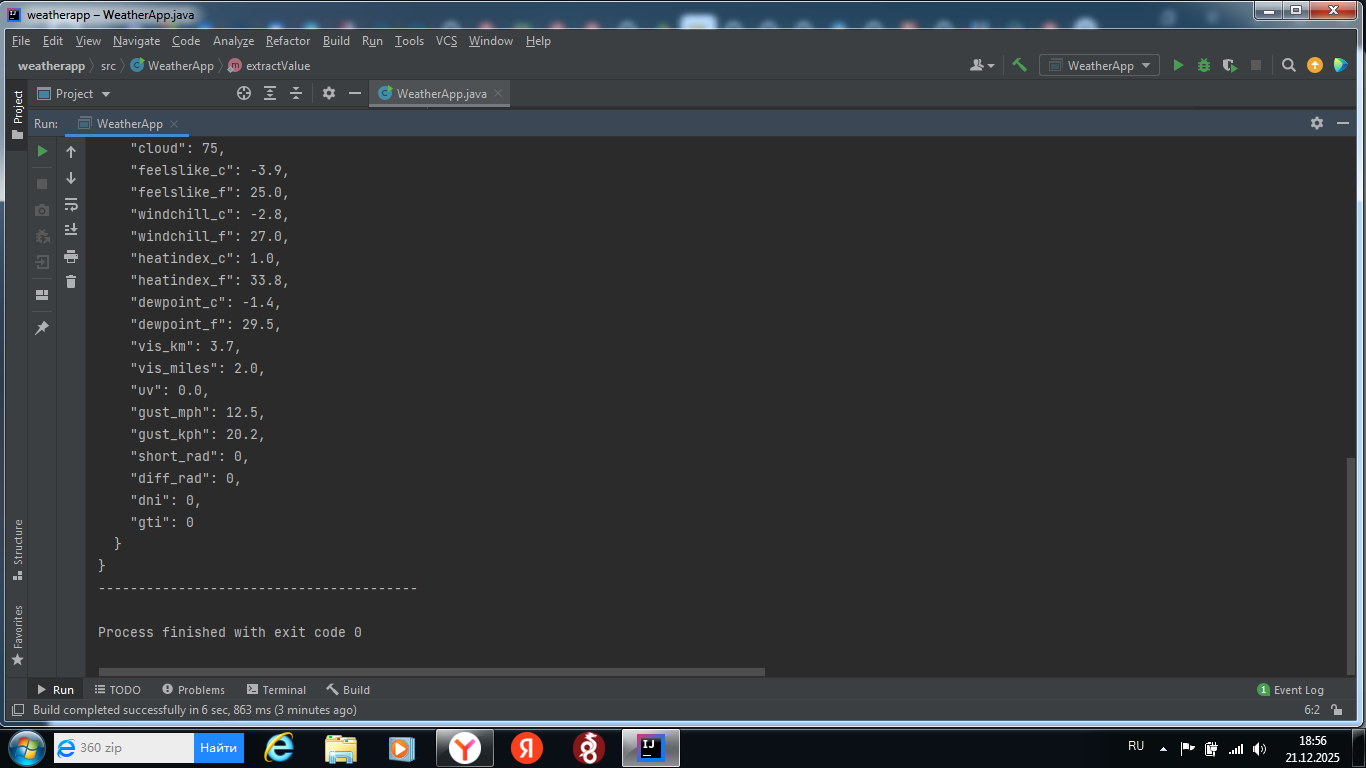